## Kwanza Tukule Data Analyst Assessment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from math import sqrt
from random import random
from pylab import rcParams

# use whitegrid style
sns.set(style="whitegrid")
import plotly.graph_objects as go

# forecasting libraries
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from patsy import dmatrices
#from pmdarima.arima import auto_arima
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error

## anomaly detection libraries
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest

In [2]:
import warnings

warnings.filterwarnings("ignore")

#### Section 1: Data Cleaning and Preparation (20 points)
- Data Quality Assessment: Inspect the dataset for missing values, duplicates, or inconsistent data types. Provide a summary of issues identified and the steps taken to resolve them.

#### Reading the Dataset

In [3]:
df = pd.read_csv("Case Study Data.csv")
df.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,"August 18, 2024, 9:32 PM",Category-106,Product-21f4,Business-de42,Location-1ba8,1,850
1,"August 18, 2024, 9:32 PM",Category-120,Product-4156,Business-de42,Location-1ba8,2,"1,910"
2,"August 18, 2024, 9:32 PM",Category-121,Product-49bd,Business-de42,Location-1ba8,1,"3,670"
3,"August 18, 2024, 9:32 PM",Category-76,Product-61dd,Business-de42,Location-1ba8,1,"2,605"
4,"August 18, 2024, 9:32 PM",Category-119,Product-66e0,Business-de42,Location-1ba8,5,"1,480"


### Dataset Exploration

In [4]:
df.shape

(333405, 7)

In [5]:
df.dtypes

DATE                   object
ANONYMIZED CATEGORY    object
ANONYMIZED PRODUCT     object
ANONYMIZED BUSINESS    object
ANONYMIZED LOCATION    object
QUANTITY                int64
UNIT PRICE             object
dtype: object

### Checking missing values

In [6]:
df.isna().sum()

DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             8
dtype: int64

In [7]:
df[df['UNIT PRICE'].isna()]

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
108112,"July 3, 2024, 5:53 PM",Category-94,Product-3d7f,Business-4fce,Location-f37d,2,NaN
150961,"December 16, 2024, 6:33 PM",Category-79,Product-dfc8,Business-8bbf,Location-3fc0,1,NaN
151142,"December 22, 2024, 2:42 PM",Category-122,Product-15e0,Business-c575,Location-1979,3,NaN
272379,"June 27, 2024, 12:15 PM",Category-92,Product-ccbc,Business-14b6,Location-1979,1,NaN
278284,"August 14, 2024, 9:09 PM",Category-101,Product-84a5,Business-4be1,Location-bb69,21,NaN
278384,"December 30, 2024, 2:17 PM",Category-95,Product-15f3,Business-1a74,Location-f37d,1,NaN
310385,"March 31, 2024, 2:03 PM",Category-114,Product-9204,Business-c9dc,Location-689f,1,NaN
327152,"August 13, 2024, 4:20 PM",Category-107,Product-7eed,Business-0d61,Location-1ba8,1,NaN


In [8]:
df[(df['ANONYMIZED PRODUCT'] == "Product-3d7f") & (df['ANONYMIZED BUSINESS'] == 'Business-4fce')]

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
108112,"July 3, 2024, 5:53 PM",Category-94,Product-3d7f,Business-4fce,Location-f37d,2,NaN
136504,"July 3, 2024, 6:05 PM",Category-94,Product-3d7f,Business-4fce,Location-f37d,2,875


In [9]:
df[(df['ANONYMIZED PRODUCT'] == "Product-dfc8") & (df['ANONYMIZED BUSINESS'] == 'Business-8bbf')]

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
150961,"December 16, 2024, 6:33 PM",Category-79,Product-dfc8,Business-8bbf,Location-3fc0,1,NaN


In [10]:
df[(df['ANONYMIZED PRODUCT'] == "Product-9204") & (df['ANONYMIZED BUSINESS'] == 'Business-c9dc')]

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
310385,"March 31, 2024, 2:03 PM",Category-114,Product-9204,Business-c9dc,Location-689f,1,NaN


- checking on the data duplication

In [11]:
df[df.duplicated()]

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
6153,"January 6, 2024, 11:52 AM",Category-91,Product-1b48,Business-20fc,Location-b125,1,"3,680"
7554,"July 9, 2024, 2:26 PM",Category-104,Product-af50,Business-476c,Location-b27b,1,"1,310"
7555,"July 9, 2024, 2:26 PM",Category-92,Product-d09a,Business-476c,Location-b27b,1,"1,550"
12238,"April 19, 2024, 3:19 PM",Category-75,Product-086d,Business-b48e,Location-03fc,3,"2,090"
12239,"April 19, 2024, 3:19 PM",Category-106,Product-21f4,Business-b48e,Location-03fc,2,850
...,...,...,...,...,...,...,...
333133,"February 1, 2024, 9:17 AM",Category-111,Product-7fac,Business-4919,Location-3e32,3,814
333134,"February 1, 2024, 9:17 AM",Category-77,Product-d09c,Business-4919,Location-3e32,1,"3,200"
333350,"June 10, 2024, 10:08 PM",Category-76,Product-e805,Business-54ad,Location-3e32,5,"5,965"
333399,"January 9, 2024, 8:49 PM",Category-97,Product-bbdc,Business-f9ff,Location-1979,1,341


In [12]:
len(df[df.duplicated()])

3524

In [13]:
df.describe()

,QUANTITY
count,333405.000000
mean,2.321186
std,3.790614
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,359.000000


#### Data Issues Found
- Columns Names have spaces, this can replace by underscore.
- Date column is in a wrong data dtypes(object) instead of Datetime
- Unit price is also is a wrong data type instead of a numeric datatype(float)
- Unit Price has 8 missing values.
- There are 3524 duplicated data on the dataset.

#### Steps to resolve the data Issues
- Removing space from column names and replacing with '_'

In [14]:
# replace space with '_'
df.columns = df.columns.str.replace(' ', '_')

# check
df.columns

Index(['DATE', 'ANONYMIZED_CATEGORY', 'ANONYMIZED_PRODUCT',
       'ANONYMIZED_BUSINESS', 'ANONYMIZED_LOCATION', 'QUANTITY', 'UNIT_PRICE'],
      dtype='object')

- Correcting the wrong datatypes, Date & Unit Price

In [15]:
# convert date to Datetime data type
df['DATE'] = pd.to_datetime(df['DATE'])

# test(check if corrected)
df['DATE'].dtype

dtype('<M8[ns]')

In [16]:
df['UNIT_PRICE'].unique()[:20]

array(['850', '1,910', '3,670', '2,605', '1,480', '1,940', '1,460', '805',
       '1,350', '1,700', '3,650', '1,800', '4,000', '815', '2,500', '750',
       '2,255', '2,540', '1,880', '2,120'], dtype=object)

> from the sample above it seems the, values are integers, but the comma after 3 values, is the problem.

- First remove the comma in the unit price

In [17]:
df['UNIT_PRICE'] = df['UNIT_PRICE'].str.replace(',', '')

# check
df['UNIT_PRICE'][:5]

0     850
1    1910
2    3670
3    2605
4    1480
Name: UNIT_PRICE, dtype: object

In [18]:
# convert unit_price to numeric
df['UNIT_PRICE'] = pd.to_numeric(df['UNIT_PRICE'])

# check
df['UNIT_PRICE'].dtype

dtype('float64')

- Removing Duplicate Values
    - Remove duplicates values(NB: I think one of the values should be kept)

In [135]:
# dropiing duplicates the parameter keep first ensure one(firt record is retained)
df = df.drop_duplicates(keep='first')

# check
len(df[df.duplicated()])

0

> On duplicates Values, The values need to be further check maybe from ERP to confirm on duplication Issues.

- Dealing with missing values.
    - my thoughts here is same product within same place shares common price.

In [20]:
df.isna().sum()

DATE                   0
ANONYMIZED_CATEGORY    0
ANONYMIZED_PRODUCT     0
ANONYMIZED_BUSINESS    0
ANONYMIZED_LOCATION    0
QUANTITY               0
UNIT_PRICE             8
dtype: int64

In [21]:
# Fill missing UNIT_PRICE with the same price for the same product, location, and business
df['UNIT_PRICE'] = df['UNIT_PRICE'].fillna(
    df.groupby(['ANONYMIZED_PRODUCT', 'ANONYMIZED_LOCATION', 'ANONYMIZED_BUSINESS'])['UNIT_PRICE'].transform('first')
)

In [22]:
df[df['UNIT_PRICE'].isna()]

,DATE,ANONYMIZED_CATEGORY,ANONYMIZED_PRODUCT,ANONYMIZED_BUSINESS,ANONYMIZED_LOCATION,QUANTITY,UNIT_PRICE
150961,2024-12-16 18:33:00,Category-79,Product-dfc8,Business-8bbf,Location-3fc0,1,NaN
151142,2024-12-22 14:42:00,Category-122,Product-15e0,Business-c575,Location-1979,3,NaN
272379,2024-06-27 12:15:00,Category-92,Product-ccbc,Business-14b6,Location-1979,1,NaN
278384,2024-12-30 14:17:00,Category-95,Product-15f3,Business-1a74,Location-f37d,1,NaN
310385,2024-03-31 14:03:00,Category-114,Product-9204,Business-c9dc,Location-689f,1,NaN


In [23]:
df[df['ANONYMIZED_PRODUCT'] == 'Product-15e0']

,DATE,ANONYMIZED_CATEGORY,ANONYMIZED_PRODUCT,ANONYMIZED_BUSINESS,ANONYMIZED_LOCATION,QUANTITY,UNIT_PRICE
11995,2024-12-29 20:42:00,Category-122,Product-15e0,Business-1f55,Location-e2f8,50,2480.0
105503,2024-12-23 17:28:00,Category-122,Product-15e0,Business-a68c,Location-689f,2,2480.0
151142,2024-12-22 14:42:00,Category-122,Product-15e0,Business-c575,Location-1979,3,NaN
187599,2024-12-23 17:55:00,Category-122,Product-15e0,Business-f8a0,Location-f37d,3,2480.0
199322,2024-12-23 18:00:00,Category-122,Product-15e0,Business-75cd,Location-47dc,1,2480.0
203067,2024-12-23 17:41:00,Category-122,Product-15e0,Business-bab3,Location-689f,5,2480.0
309055,2024-12-27 13:13:00,Category-122,Product-15e0,Business-1f55,Location-e2f8,7,2480.0


> Checking on the missing unit value product, I found the some product having same price across, so this I will directly replace price, but the other product not having same merge I decide to drop on those

In [24]:
# Identify products with a consistent price
consistent_price = df.groupby('ANONYMIZED_PRODUCT')['UNIT_PRICE'].transform('nunique') == 1

# Fill missing UNIT_PRICE using consistent product prices
df['UNIT_PRICE'] = df['UNIT_PRICE'].fillna(
    df[consistent_price].groupby('ANONYMIZED_PRODUCT')['UNIT_PRICE'].transform('first')
)

# check missing values:
df.isna().sum()

DATE                   0
ANONYMIZED_CATEGORY    0
ANONYMIZED_PRODUCT     0
ANONYMIZED_BUSINESS    0
ANONYMIZED_LOCATION    0
QUANTITY               0
UNIT_PRICE             3
dtype: int64

the remaining missing 3 values I decide to drop, since the is no correlation to tell there prices

In [25]:
# Drop rows where UNIT_PRICE is still missing
df = df.dropna(subset=['UNIT_PRICE'])

In [26]:
df.shape

(329878, 7)

#### Feature Engineering: 
- Create the following columns: “Month-Year” (e.g., August 2024) from the “DATE” column. (include a screenshot of this in your submission)

In [27]:
df['DATE'].dt.to_period('M')

0         2024-08
1         2024-08
2         2024-08
3         2024-08
4         2024-08
           ...   
333398    2024-11
333401    2024-08
333402    2024-08
333403    2024-10
333404    2024-10
Name: DATE, Length: 329878, dtype: period[M]

In [28]:
df['Month-Year'] = df['DATE'].dt.month_name() + '-' + df['DATE'].dt.year.astype(str)
df['Month-Year'][:5]

0    August-2024
1    August-2024
2    August-2024
3    August-2024
4    August-2024
Name: Month-Year, dtype: object

In [29]:
df.columns

Index(['DATE', 'ANONYMIZED_CATEGORY', 'ANONYMIZED_PRODUCT',
       'ANONYMIZED_BUSINESS', 'ANONYMIZED_LOCATION', 'QUANTITY', 'UNIT_PRICE',
       'Month-Year'],
      dtype='object')

- Save Cleaned Data maybe reuse case comes in later.

In [30]:
df.to_csv("clean_case_study_data.csv", index=False)

### Section 2: Exploratory Data Analysis (30 points)

- Sales Overview:
    - Calculate total Quantity and Value grouped by:
        - Anonymized Category
        - Anonymized Business
    -   Provide visualizations (e.g., bar charts or tables) to support your findings.

* Getting the Sales value, then groupby and sum.

In [34]:
# Calculate sales value
df['SALES_VALUE'] = df['QUANTITY'] * df['UNIT_PRICE']

- Anonymized Category

In [35]:
df['ANONYMIZED_CATEGORY'].nunique()

46

There are 46 unique category in the dataset

In [125]:
#df.groupby('ANONYMIZED_CATEGORY')['QUANTITY'].sum().reset_index().sort_values('QUANTITY', ascending=False)

In [36]:
# Group by 'ANONYMIZED_CATEGORY' and calculate total Quantity and Sales Value
category_summary = df.groupby('ANONYMIZED_CATEGORY').agg(
    TOTAL_QUANTITY=('QUANTITY', 'sum'),
    TOTAL_SALES_VALUE=('SALES_VALUE', 'sum')
).sort_values('TOTAL_SALES_VALUE', ascending=False).reset_index()
category_summary.head(10)

,ANONYMIZED_CATEGORY,TOTAL_QUANTITY,TOTAL_SALES_VALUE
0,Category-75,151330,544658700.0
1,Category-76,71719,344939553.0
2,Category-120,169715,319178743.0
3,Category-100,76824,134902751.0
4,Category-119,68332,103454819.0
5,Category-77,28455,76741382.0
6,Category-91,20853,44152103.0
7,Category-101,19585,35614152.0
8,Category-85,22997,33762533.0
9,Category-121,14669,22327643.0


In [31]:
import plotly.io as pio
#pio.renderers.default = 'browser'  # Tto open charts on browser.


In [37]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_separate_side_by_side(df, x_column, quantity_column, sales_column, title_quantity, title_sales, xlabel):
    # Create a subplot with 1 row and 2 columns
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=[title_quantity, title_sales],
        column_widths=[0.5, 0.5]  # Even distribution for both plots
    )

    # Add Total Quantity plot (first subplot)
    fig.add_trace(go.Bar(
        x=df[x_column],
        y=df[quantity_column],
        name='Total Quantity',
        marker_color='skyblue'
    ), row=1, col=1)

    # Add Total Sales Value plot (second subplot)
    fig.add_trace(go.Bar(
        x=df[x_column],
        y=df[sales_column],
        name='Total Sales Value',
        marker_color='teal'
    ), row=1, col=2)

    # Update layout to improve appearance and add titles
    fig.update_layout(
        title='Comparison of Total Quantity and Sales Value',
        showlegend=False,
        xaxis=dict(title=xlabel, tickangle=-45),
        xaxis2=dict(title=xlabel, tickangle=-45),
        template='plotly_white',
        height=600  # Increase height for better visibility
    )

    # Show the figure
    fig.show()

# Side-by-Side Plots for Anonymized Category
plot_separate_side_by_side(
    category_summary.head(20),
    x_column='ANONYMIZED_CATEGORY',
    quantity_column='TOTAL_QUANTITY',
    sales_column='TOTAL_SALES_VALUE',
    title_quantity='Total Quantity by Anonymized Category',
    title_sales='Total Sales Value by Anonymized Category',
    xlabel='Anonymized Category'
)

**This graphs plotted on the browsers I'll share a screenshot on the report**

- ANONYMIZED_BUSINESS

In [38]:
# Group by 'ANONYMIZED_BUSINESS' and calculate total Quantity and Value
business_summary = df.groupby('ANONYMIZED_BUSINESS').agg(
    TOTAL_QUANTITY=('QUANTITY', 'sum'),
    TOTAL_SALES_VALUE=('SALES_VALUE', 'sum')
).sort_values('TOTAL_SALES_VALUE', ascending=False).reset_index()
business_summary.head(20)

,ANONYMIZED_BUSINESS,TOTAL_QUANTITY,TOTAL_SALES_VALUE
0,Business-978e,13991,28037358.0
1,Business-fe7d,6743,26997121.0
2,Business-6068,8214,16464195.0
3,Business-07de,6065,16258068.0
4,Business-7a03,6318,13968451.0
5,Business-ba13,5533,13650016.0
6,Business-1e3e,4981,13192967.0
7,Business-468e,5450,12546597.0
8,Business-f4f4,3852,11952941.0
9,Business-5613,4089,11895552.0


In [39]:
# Side-by-Side Plots for Anonymized Category
plot_separate_side_by_side(
    business_summary.head(20),
    x_column='ANONYMIZED_BUSINESS',
    quantity_column='TOTAL_QUANTITY',
    sales_column='TOTAL_SALES_VALUE',
    title_quantity='Total Quantity by Anonymized Business',
    title_sales='Total Sales Value by Anonymized Business',
    xlabel='Anonymized Business'
)

#### 2. Trends Over Time:
- Analyze sales trends (Value and Quantity) by Month-Year. Create a time series plot to show seasonal patterns or changes in sales performance.

- **Note** for plotting a trend line on any foreacting data has to sorted using date

In [40]:
df['DATE'].min(), df['DATE'].max()

(Timestamp('2024-01-01 05:54:00'), Timestamp('2024-12-31 18:24:00'))

In [41]:
## check if the data is sorted according to date
df = df.sort_values('DATE').reset_index(drop=True)
df.head()

,DATE,ANONYMIZED_CATEGORY,ANONYMIZED_PRODUCT,ANONYMIZED_BUSINESS,ANONYMIZED_LOCATION,QUANTITY,UNIT_PRICE,Month-Year,SALES_VALUE
0,2024-01-01 05:54:00,Category-75,Product-086d,Business-83dd,Location-66f4,10,2185.0,January-2024,21850.0
1,2024-01-01 05:54:00,Category-85,Product-0c64,Business-83dd,Location-66f4,1,1190.0,January-2024,1190.0
2,2024-01-01 07:18:00,Category-120,Product-4156,Business-d7a8,Location-1979,2,2180.0,January-2024,4360.0
3,2024-01-01 07:18:00,Category-75,Product-2175,Business-d7a8,Location-1979,1,4365.0,January-2024,4365.0
4,2024-01-01 10:45:00,Category-85,Product-6859,Business-4af0,Location-d1a8,2,885.0,January-2024,1770.0


In [42]:
# Calculate the total TOTAL_SALES_VALUE (QUANTITY * UNIT_PRICE)
df['TOTAL_SALES_VALUE'] = df['QUANTITY'] * df['UNIT_PRICE']

# Aggregate by Month-Year
df['MONTH_YEAR'] = df['DATE'].dt.to_period('M')  # Create a Month-Year column
monthly_sales = df.groupby('MONTH_YEAR').agg({'TOTAL_SALES_VALUE': 'sum', 'QUANTITY': 'sum'}).reset_index()

# Convert MONTH_YEAR back to datetime for plotting
monthly_sales['MONTH_YEAR'] = monthly_sales['MONTH_YEAR'].dt.to_timestamp()
monthly_sales

,MONTH_YEAR,TOTAL_SALES_VALUE,QUANTITY
0,2024-01-01,185626186.0,67526
1,2024-02-01,126579702.0,44063
2,2024-03-01,116000676.0,45381
3,2024-04-01,122110750.0,50554
4,2024-05-01,168781502.0,69551
5,2024-06-01,135140164.0,60717
6,2024-07-01,171042631.0,74691
7,2024-08-01,146618918.0,68859
8,2024-09-01,137791455.0,66747
9,2024-10-01,183840551.0,84739


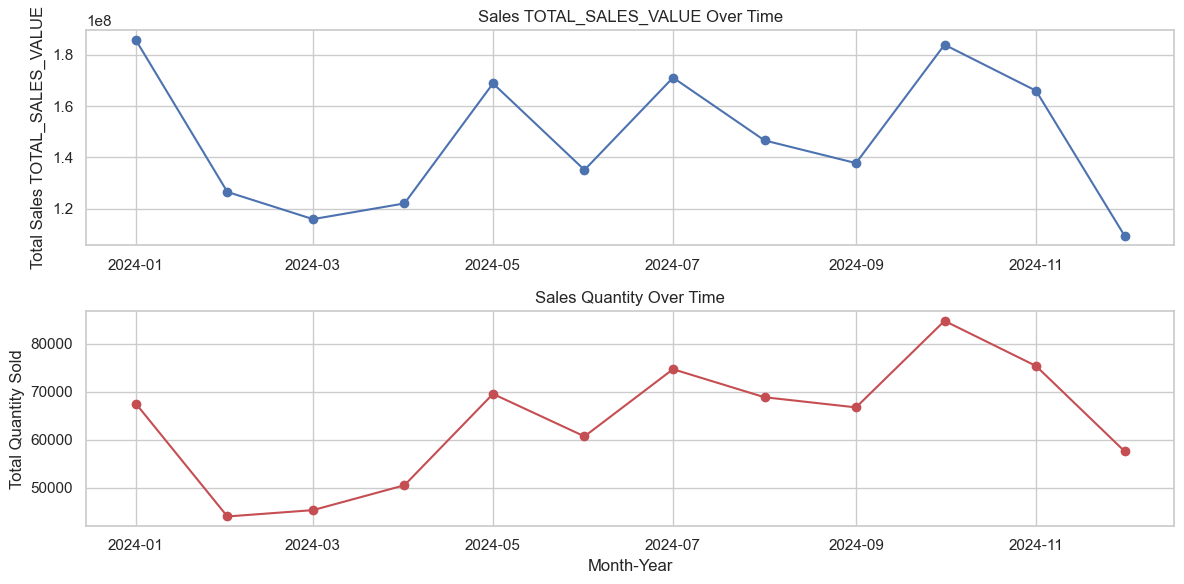

In [134]:
# Plotting the time series
plt.figure(figsize=(12, 6))

# Plot for TOTAL_SALES_VALUE
plt.subplot(2, 1, 1)
plt.plot(monthly_sales['MONTH_YEAR'], monthly_sales['TOTAL_SALES_VALUE'], marker='o', linestyle='-', color='b')
plt.title('Sales TOTAL_SALES_VALUE Over Time')
plt.ylabel('Total Sales TOTAL_SALES_VALUE')
plt.grid(True)

# Plot for Quantity
plt.subplot(2, 1, 2)
plt.plot(monthly_sales['MONTH_YEAR'], monthly_sales['QUANTITY'], marker='o', linestyle='-', color='r')
plt.title('Sales Quantity Over Time')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Month-Year')
plt.grid(True)

plt.tight_layout()
plt.show()

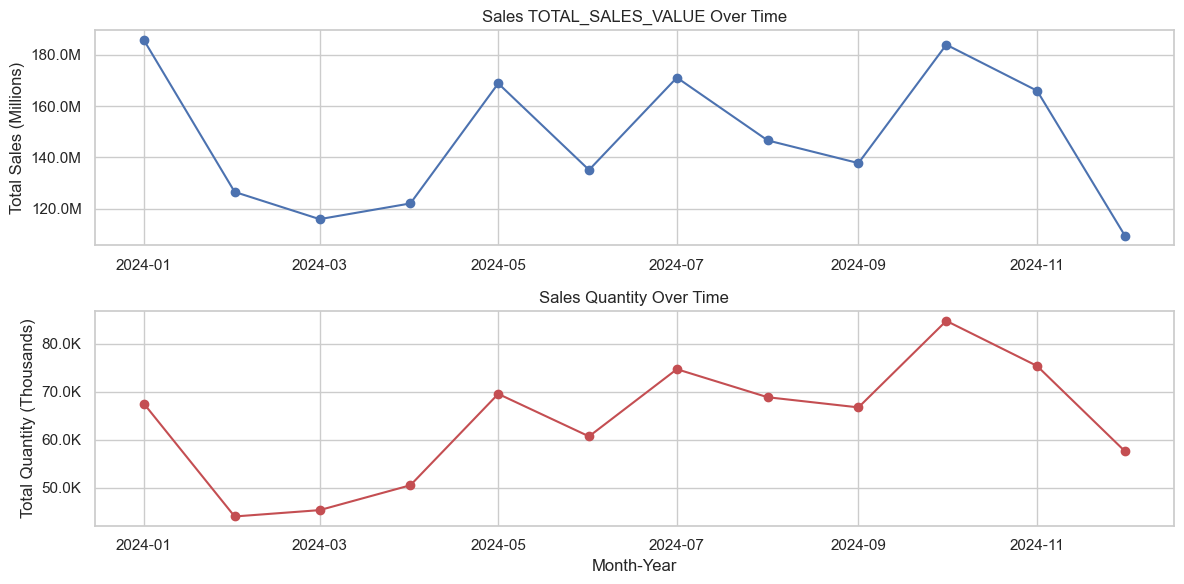

In [43]:
# Convert sales to millions and quantity to thousands
monthly_sales['TOTAL_SALES_VALUE'] /= 1_000_000  # Convert to Millions
monthly_sales['QUANTITY'] /= 1_000  # Convert to Thousands

plt.figure(figsize=(12, 6))

# Plot for TOTAL_SALES_VALUE (in Millions)
plt.subplot(2, 1, 1)
plt.plot(monthly_sales['MONTH_YEAR'], monthly_sales['TOTAL_SALES_VALUE'], marker='o', linestyle='-', color='b')
plt.title('Sales TOTAL_SALES_VALUE Over Time')
plt.ylabel('Total Sales (Millions)')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:.1f}M'))  # Format as Millions
plt.grid(True)

# Plot for Quantity (in Thousands)
plt.subplot(2, 1, 2)
plt.plot(monthly_sales['MONTH_YEAR'], monthly_sales['QUANTITY'], marker='o', linestyle='-', color='r')
plt.title('Sales Quantity Over Time')
plt.ylabel('Total Quantity (Thousands)')
plt.xlabel('Month-Year')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:.1f}K'))  # Format as Thousands
plt.grid(True)

plt.tight_layout()
plt.show()

#### 3. Performance Analysis:
- Identify the top 5 most frequently purchased products (based on Quantity).
- Identify the top 5 most valuable products (based on Value).

In [44]:
# group product, thn to get total sales value and quantity of each product
product_summary = df.groupby('ANONYMIZED_PRODUCT').agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Sales_Value=('TOTAL_SALES_VALUE', 'sum')
).reset_index()

# pick the top 5 product by total Quantity
top_5_frequent_products = product_summary.nlargest(5, 'Total_Quantity').reset_index(drop=True)
top_5_frequent_products

,ANONYMIZED_PRODUCT,Total_Quantity,Total_Sales_Value
0,Product-66e0,46957,70704225.0
1,Product-e805,42602,262787281.0
2,Product-8f75,37566,158797460.0
3,Product-29ee,35940,68248274.0
4,Product-4156,28487,56956007.0


In [137]:
# # Plot top 5 most frequently purchased products
# plt.figure(figsize=(10, 6))
# sns.barplot(
#     x='Total_Quantity',
#     y='ANONYMIZED_PRODUCT',
#     data=top_5_frequent_products.sort_values(by='Total_Quantity', ascending=False),
#     # palette='viridis'
# )
# plt.title('Top 5 Most Frequently Purchased Products', fontsize=16)
# plt.xlabel('Total Quantity', fontsize=12)
# plt.ylabel('Product', fontsize=12)
# plt.show()

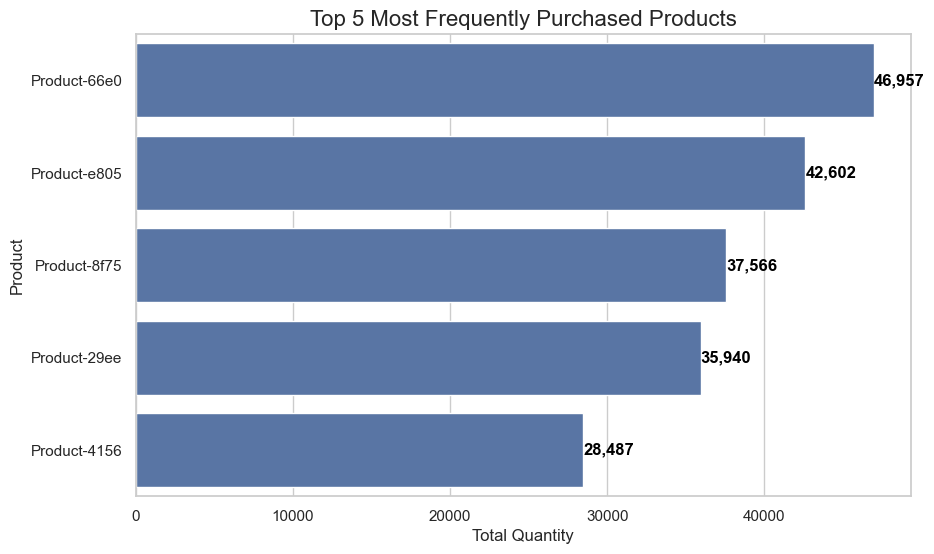

In [45]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Total_Quantity',
    y='ANONYMIZED_PRODUCT',
    data=top_5_frequent_products.sort_values(by='Total_Quantity', ascending=False),
)

plt.title('Top 5 Most Frequently Purchased Products', fontsize=16)
plt.xlabel('Total Quantity', fontsize=12)
plt.ylabel('Product', fontsize=12)

# Annotate values on top of each bar
for bar in ax.patches:
    plt.text(
        bar.get_width() + 0.5,  # Adjust placement slightly to the right
        bar.get_y() + bar.get_height() / 2,  # Center the text vertically
        f'{int(bar.get_width()):,}',  # Format number with thousands separator
        ha='left',  # Align left for clarity
        va='center',
        fontsize=12,
        fontweight='bold',
        color='black'
    )

plt.show()

In [191]:
# Identify top 5 most valuable products(sales value)
top_5_valuable_products = product_summary.nlargest(5, 'Total_Sales_Value').reset_index(drop=True)
top_5_valuable_products

,ANONYMIZED_PRODUCT,Total_Quantity,Total_Sales_Value
0,Product-e805,42602,262787281.0
1,Product-8f75,37566,158797460.0
2,Product-66e0,46957,70704225.0
3,Product-29ee,35940,68248274.0
4,Product-4156,28487,56956007.0


In [140]:
# # Plot top 5 most valuable products
# plt.figure(figsize=(10, 6))
# sns.barplot(
#     x='Total_Sales_Value',
#     y='ANONYMIZED_PRODUCT',
#     data=top_5_valuable_products.sort_values(by='Total_Sales_Value', ascending=False),
#     # palette='coolwarm'
# )
# plt.title('Top 5 Most Valuable Products', fontsize=16)
# plt.xlabel('Total Value', fontsize=12)
# plt.ylabel('Product', fontsize=12)
# plt.show()

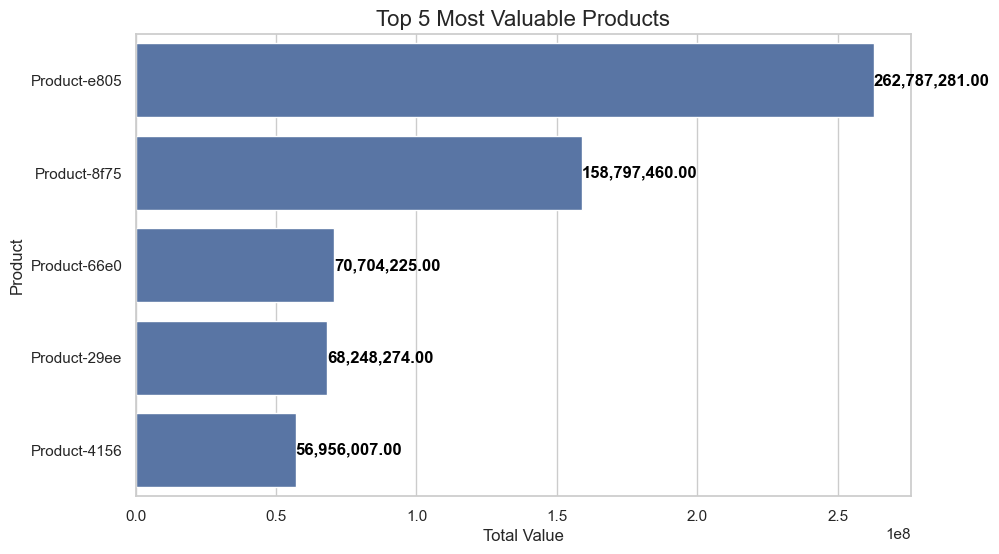

In [192]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Total_Sales_Value',
    y='ANONYMIZED_PRODUCT',
    data=top_5_valuable_products.sort_values(by='Total_Sales_Value', ascending=False),
    #palette='coolwarm'
)

plt.title('Top 5 Most Valuable Products', fontsize=16)
plt.xlabel('Total Value', fontsize=12)
plt.ylabel('Product', fontsize=12)

# Annotate values on top of each bar
for bar in ax.patches:
    plt.text(
        bar.get_width() + 0.5,  # Adjust placement slightly to the right
        bar.get_y() + bar.get_height() / 2,  # Center text vertically
        f'{bar.get_width():,.2f}',  # Format as currency (e.g., 10,000.00)
        ha='left',  # Align left for better visibility
        va='center',
        fontsize=12,
        fontweight='bold',
        color='black'
    )

plt.show()

##### Classify businesses into 3 groups (e.g., High Value, Medium Value, Low Value) and provide recommendations for engagement with each group.

In [51]:
# Aggregate metrics for each business # feature engineering for clustering
business_summary = df.groupby('ANONYMIZED_BUSINESS').agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('TOTAL_SALES_VALUE', 'sum'),
    Frequency=('DATE', 'count') # frequency on daily
).reset_index()

In [52]:
# Standardizing the metrics
scaler = StandardScaler()
scaled_data = scaler.fit_transform(business_summary[['Total_Quantity', 'Total_Value', 'Frequency']])

In [53]:
# Apply K-Means clustering, tool to the standard data, k= 3 groups
kmeans = KMeans(n_clusters=3, random_state=42)
business_summary['Segment'] = kmeans.fit_predict(scaled_data)
business_summary

,ANONYMIZED_BUSINESS,Total_Quantity,Total_Value,Frequency,Segment
0,Business-0000,8,10445.0,8,0
1,Business-0005,1,2645.0,1,0
2,Business-0029,26,77340.0,6,0
3,Business-003d,98,221761.0,31,0
4,Business-0072,127,225056.0,101,0
...,...,...,...,...,...
4795,Business-ffa9,3,6740.0,3,0
4796,Business-ffae,6,10530.0,5,0
4797,Business-ffb1,266,438115.0,105,0
4798,Business-ffd2,37,67723.0,22,0


In [54]:
# Clusterinng results
print("Segmented Business Summary:")
business_summary['Segment'].value_counts()

Segmented Business Summary:


Segment
0    4472
2     305
1      23
Name: count, dtype: int64

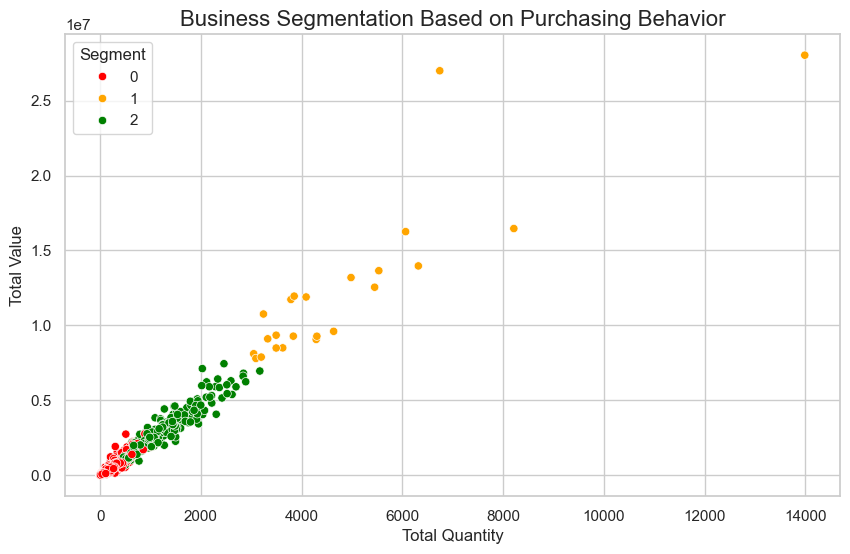

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Total_Quantity',
    y='Total_Value',
    hue='Segment',
    data=business_summary,
    palette={0: 'red', 1: 'orange', 2: 'green'}  # Use numeric keys
)
plt.title('Business Segmentation Based on Purchasing Behavior', fontsize=16)
plt.xlabel('Total Quantity', fontsize=12)
plt.ylabel('Total Value', fontsize=12)
plt.legend(title='Segment')
plt.show()

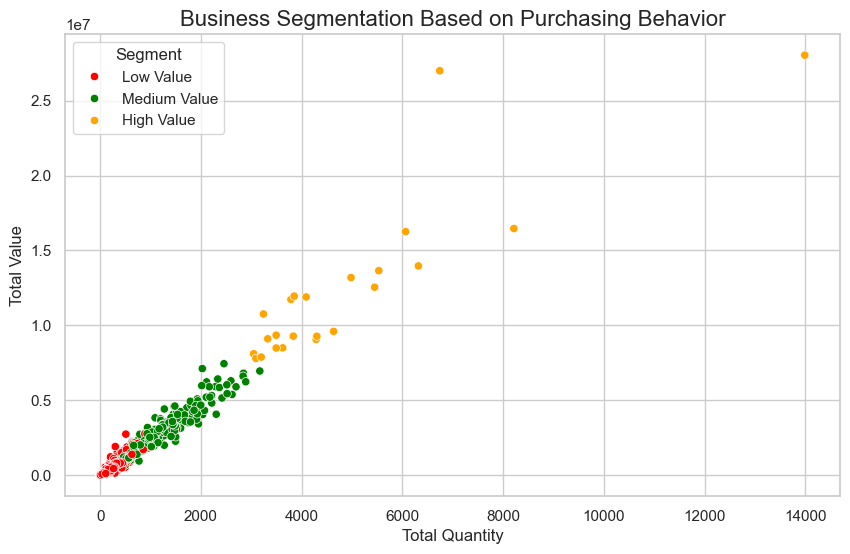

In [56]:
# Map numeric segment values to categorical labels
segment_mapping = {0: 'Low Value', 2: 'Medium Value', 1: 'High Value'}
business_summary['Segment'] = business_summary['Segment'].map(segment_mapping)

# plotting clustering results output
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Total_Quantity',
    y='Total_Value',
    hue='Segment',
    data=business_summary,
    palette={'Low Value': 'red', 'Medium Value': 'green', 'High Value': 'orange'}
)
plt.title('Business Segmentation Based on Purchasing Behavior', fontsize=16)
plt.xlabel('Total Quantity', fontsize=12)
plt.ylabel('Total Value', fontsize=12)
plt.legend(title='Segment')
plt.show()

In [57]:
df.columns

Index(['DATE', 'ANONYMIZED_CATEGORY', 'ANONYMIZED_PRODUCT',
       'ANONYMIZED_BUSINESS', 'ANONYMIZED_LOCATION', 'QUANTITY', 'UNIT_PRICE',
       'Month-Year', 'SALES_VALUE', 'TOTAL_SALES_VALUE', 'MONTH_YEAR'],
      dtype='object')

#### Forecasting: 
- Using the provided data, forecast the total sales (Value) for the next 3 months. Use an appropriate time-series forecasting method (e.g., ARIMA, moving average, or exponential smoothing).

In [58]:
monthly_sales.columns

Index(['MONTH_YEAR', 'TOTAL_SALES_VALUE', 'QUANTITY'], dtype='object')

In [59]:
monthly_sales.head()

,MONTH_YEAR,TOTAL_SALES_VALUE,QUANTITY
0,2024-01-01,185.626186,67.526
1,2024-02-01,126.579702,44.063
2,2024-03-01,116.000676,45.381
3,2024-04-01,122.110750,50.554
4,2024-05-01,168.781502,69.551


- select 'TOTAL_SALES_VALUE' only

In [60]:
monthly_sales_df = monthly_sales[['MONTH_YEAR', 'TOTAL_SALES_VALUE']]
monthly_sales_df = monthly_sales_df.set_index('MONTH_YEAR')
monthly_sales_df.head()

,TOTAL_SALES_VALUE
MONTH_YEAR,
2024-01-01,185.626186
2024-02-01,126.579702
2024-03-01,116.000676
2024-04-01,122.110750
2024-05-01,168.781502


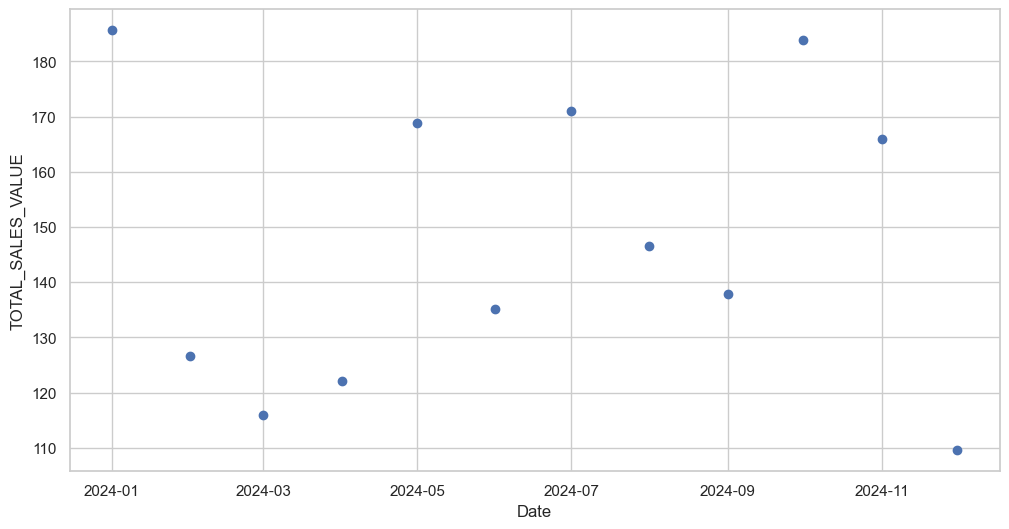

In [61]:
fig, ax = plt.subplots(figsize = (12,6))
ax.scatter(monthly_sales['MONTH_YEAR'], monthly_sales["TOTAL_SALES_VALUE"])
ax.set_xlabel('Date')
ax.set_ylabel('TOTAL_SALES_VALUE')
plt.show()

In [62]:
monthly_sales.to_csv('monthly_sales.csv', index=False)

- Split the data to train and test

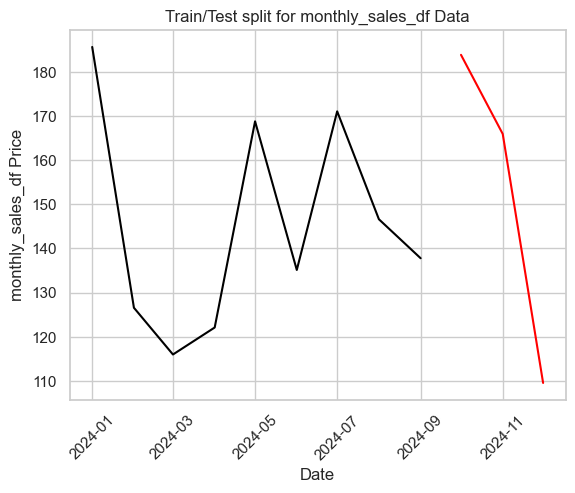

In [63]:
test_start = "2024-9-01"
test_stop = "2024-12-01"

# Ensure the DataFrame index is a datetime index
monthly_sales_df.index = pd.to_datetime(monthly_sales_df.index)

# Define the training and testing datasets
train = monthly_sales_df[monthly_sales_df.index <= pd.to_datetime(test_start, format='%Y-%m-%d')]
test = monthly_sales_df[(monthly_sales_df.index > pd.to_datetime(test_start, format='%Y-%m-%d')) & (monthly_sales_df.index <= pd.to_datetime(test_stop, format='%Y-%m-%d'))]

# Plotting the train and test data
plt.plot(train, color="black")
plt.plot(test, color="red")
plt.ylabel('monthly_sales_df Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for monthly_sales_df Data")
plt.show()

In [64]:
train.tail()

,TOTAL_SALES_VALUE
MONTH_YEAR,
2024-05-01,168.781502
2024-06-01,135.140164
2024-07-01,171.042631
2024-08-01,146.618918
2024-09-01,137.791455


In [65]:
test.head()

,TOTAL_SALES_VALUE
MONTH_YEAR,
2024-10-01,183.840551
2024-11-01,165.933104
2024-12-01,109.557214


In [66]:
order = (1, 0, 1)  # (p, d, q) - you may need to adjust these values based on your data

model = ARIMA(train['TOTAL_SALES_VALUE'], order = order)

In [67]:
arima_model = model.fit()

In [68]:
predictions = arima_model.get_forecast(steps = len(test))

In [69]:
predicted_values = predictions.predicted_mean
predicted_values

2024-10-01    141.124809
2024-11-01    143.001362
2024-12-01    143.741772
Freq: MS, Name: predicted_mean, dtype: float64

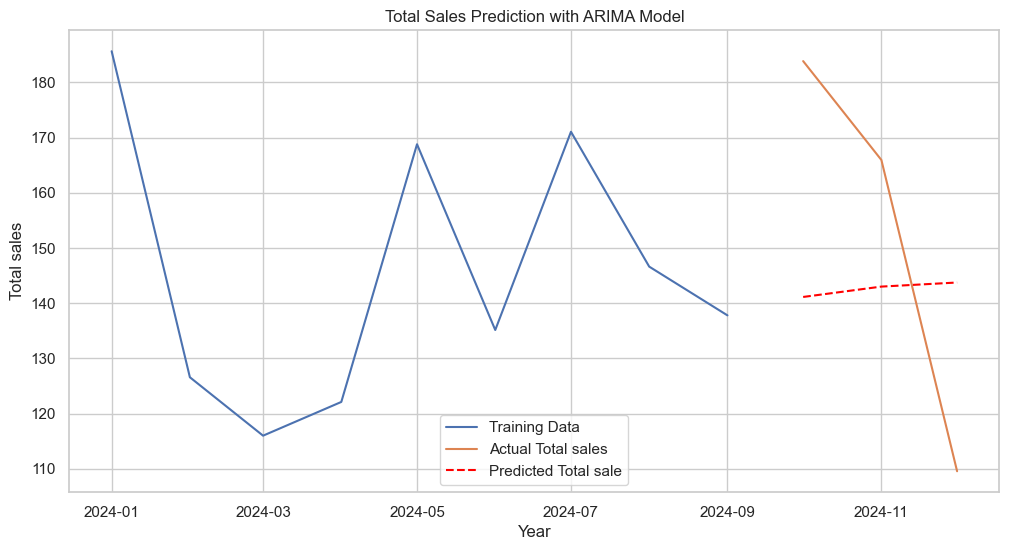

In [70]:
plt.figure(figsize = (12, 6))
plt.plot(train['TOTAL_SALES_VALUE'], label = 'Training Data')
plt.plot(test['TOTAL_SALES_VALUE'], label = f'Actual Total sales')
plt.plot(test.index, predicted_values, label = f'Predicted Total sale', linestyle = '--', color = 'red')
plt.title(f'Total Sales Prediction with ARIMA Model')
plt.xlabel('Year')
plt.ylabel('Total sales')
plt.legend()
plt.show()

In [71]:
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

mape = calculate_mape(test['TOTAL_SALES_VALUE'], predicted_values)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Percentage Error (MAPE): 22.75%


- sarimax model

In [72]:
order = (1, 0, 1)  # (p, d, q) - you may need to adjust these values based on your data
seasonal_order = (1, 1, 1, 3)  # (P, D, Q, S) - seasonal components, since my data is very small let me try 6 months seasonal, but on  final data utilize 1 yaer season.

In [73]:
model_s = SARIMAX(monthly_sales_df['TOTAL_SALES_VALUE'], order = order, seasonal_order = seasonal_order)

In [74]:
sarima_model = model_s.fit(disp = False)

In [75]:
start = len(train)
end = len(train) + len(test) - 1
predictions = sarima_model.get_prediction(start = start, end = end, dynamic = False)

In [76]:
start, end

(9, 11)

In [77]:
predicted_values = predictions.predicted_mean
predicted_values

2024-10-01    150.042095
2024-11-01    157.220114
2024-12-01    130.605756
Freq: MS, Name: predicted_mean, dtype: float64

In [78]:
monthly_sales_df.tail(3)

,TOTAL_SALES_VALUE
MONTH_YEAR,
2024-10-01,183.840551
2024-11-01,165.933104
2024-12-01,109.557214


In [79]:
mse = ((predicted_values - test['TOTAL_SALES_VALUE']) ** 2).mean()
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 553.7643192324339
Root Mean Squared Error (RMSE): 23.5321975011352


In [80]:
mape = calculate_mape(test['TOTAL_SALES_VALUE'], predicted_values)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Percentage Error (MAPE): 14.28%


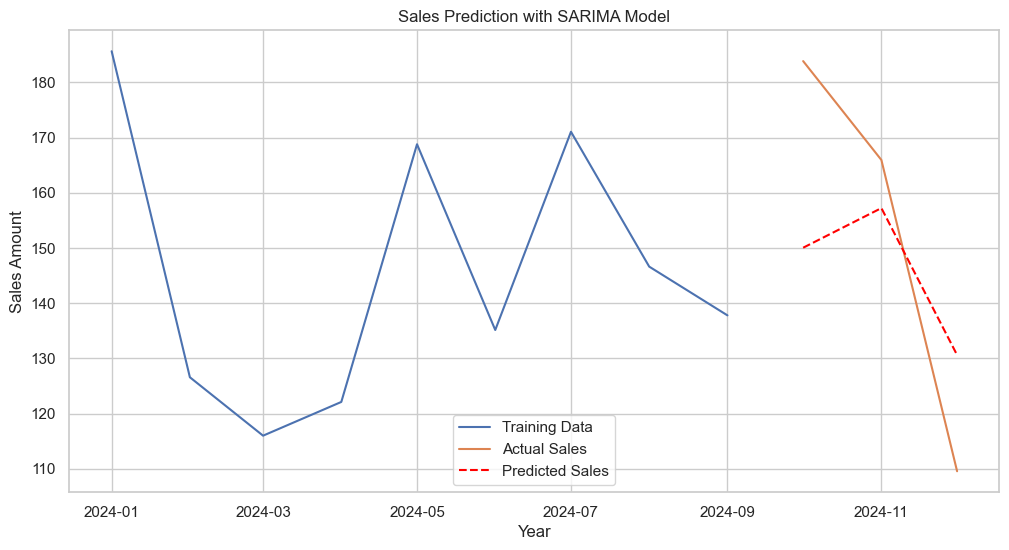

In [81]:
plt.figure(figsize = (12, 6))
plt.plot(train['TOTAL_SALES_VALUE'], label = 'Training Data')
plt.plot(test['TOTAL_SALES_VALUE'], label = f'Actual Sales')
plt.plot(predicted_values, label = f'Predicted Sales', linestyle ='--', color = 'red')
plt.title(f'Sales Prediction with SARIMA Model')
plt.xlabel('Year')
plt.ylabel(f'Sales Amount')
plt.legend()
plt.show()

- On sarima model try a seasonal of 1 year(like 1 fiscal year)

In [82]:
order = (1, 0, 1)  # (p, d, q) - you may need to adjust these values based on your data
seasonal_order = (1, 1, 1, 12)

In [83]:
start = len(monthly_sales_df)
end = len(monthly_sales_df) + 2
predictions = sarima_model.get_prediction(start = start, end = end, dynamic = False)

start, end

(12, 14)

In [84]:
predicted_values = predictions.predicted_mean
predicted_values

2025-01-01    151.458628
2025-02-01    146.797282
2025-03-01    133.905230
Freq: MS, Name: predicted_mean, dtype: float64

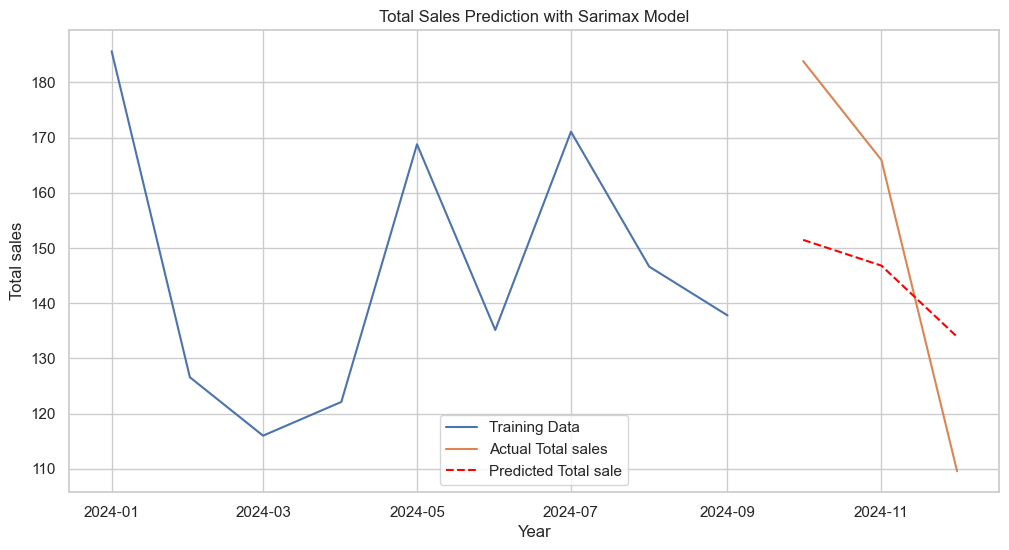

In [85]:
plt.figure(figsize = (12, 6))
plt.plot(train['TOTAL_SALES_VALUE'], label = 'Training Data')
plt.plot(test['TOTAL_SALES_VALUE'], label = f'Actual Total sales')
plt.plot(test.index, predicted_values, label = f'Predicted Total sale', linestyle = '--', color = 'red')
plt.title(f'Total Sales Prediction with Sarimax Model')
plt.xlabel('Year')
plt.ylabel('Total sales')
plt.legend()
plt.show()

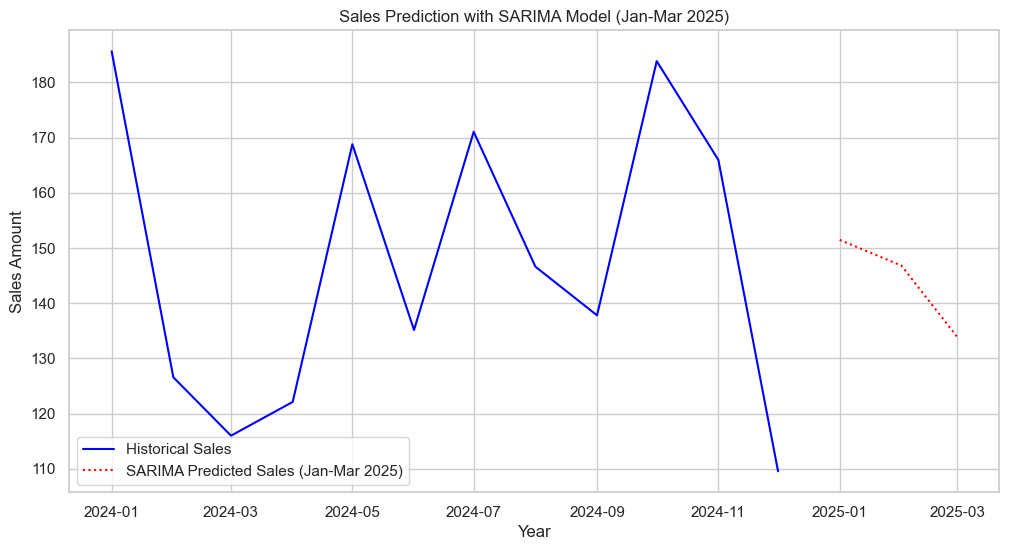

In [86]:
import matplotlib.pyplot as plt

# Plot the original monthly sales data (up to the last month)
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_df.index, monthly_sales_df['TOTAL_SALES_VALUE'], label='Historical Sales', color='blue')

# Extend the plot with the SARIMA forecasted values for Jan-Mar 2025 (dotted red line)
forecast_dates = pd.date_range(start='2025-01-01', end='2025-03-31', freq='MS')
plt.plot(forecast_dates, predictions.predicted_mean.values, label='SARIMA Predicted Sales (Jan-Mar 2025)', linestyle=':', color='red')

# Adding titles and labels
plt.title(f'Sales Prediction with SARIMA Model (Jan-Mar 2025)')
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.legend()

# Display the plot
plt.show()

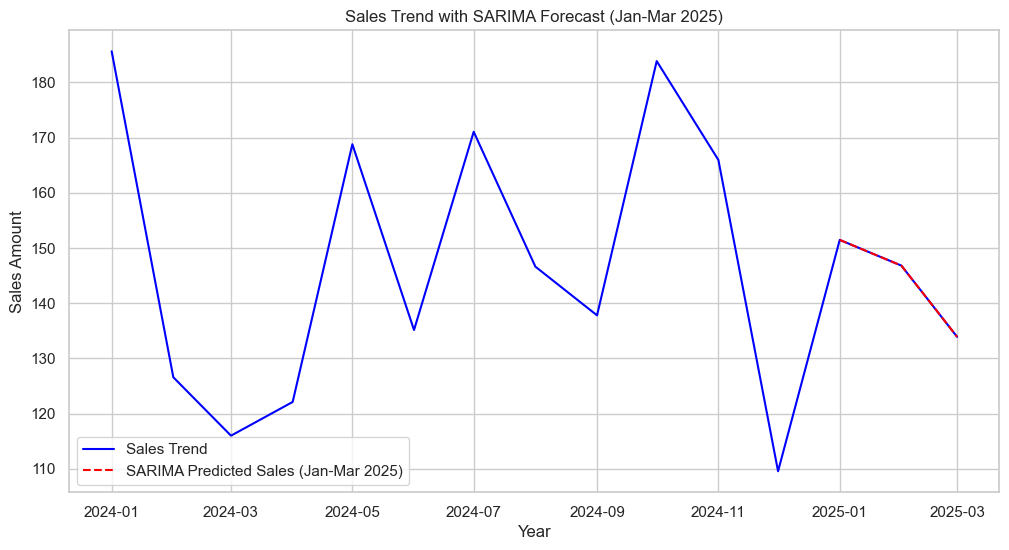

In [87]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a new dataframe that concatenates the historical data with the forecasted values
forecast_dates = pd.date_range(start='2025-01-01', end='2025-03-31', freq='MS')
forecast_df = pd.DataFrame({
    'MONTH_YEAR': forecast_dates,
    'TOTAL_SALES_VALUE': predictions.predicted_mean.values
})
monthly_sales_df_t = monthly_sales_df.reset_index()
# Concatenate historical data with the forecasted data
combined_df = pd.concat([monthly_sales_df_t[['MONTH_YEAR', 'TOTAL_SALES_VALUE']], forecast_df])

# Plotting the combined data
plt.figure(figsize=(12, 6))
plt.plot(combined_df['MONTH_YEAR'], combined_df['TOTAL_SALES_VALUE'], label='Sales Trend', color='blue')

# Highlight the forecasted (predicted) values
plt.plot(forecast_df['MONTH_YEAR'], forecast_df['TOTAL_SALES_VALUE'], label='SARIMA Predicted Sales (Jan-Mar 2025)', linestyle='--', color='red')

# Adding titles and labels
plt.title(f'Sales Trend with SARIMA Forecast (Jan-Mar 2025)')
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.legend()

# Display the plot
plt.show()

-- Trying facebook model (prophet for forecasting)

In [88]:
from prophet import Prophet

In [89]:
tr = train[['TOTAL_SALES_VALUE']]
df_p = tr.reset_index()[["MONTH_YEAR", 'TOTAL_SALES_VALUE']].rename(
    columns={"MONTH_YEAR": "ds", 'TOTAL_SALES_VALUE': "y"}
)
df_p.head()

,ds,y
0,2024-01-01,185.626186
1,2024-02-01,126.579702
2,2024-03-01,116.000676
3,2024-04-01,122.110750
4,2024-05-01,168.781502


In [90]:
ts = test.reset_index()[["MONTH_YEAR"]]
ts = ts.rename(columns={"MONTH_YEAR": "ds"})
ts

,ds
0,2024-10-01
1,2024-11-01
2,2024-12-01


- Initialize a prophet model and train it

In [91]:
# prophet model initialization
prophet_m = Prophet(seasonality_mode='additive')
prophet_m.fit(df_p)

05:07:39 - cmdstanpy - INFO - Chain [1] start processing
05:07:41 - cmdstanpy - INFO - Chain [1] done processing


In [92]:
# Make predictions
predictions = prophet_m.predict(ts)

predictions.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-10-01,145.280456,117.343479,174.013175,145.280456,145.280456,0.0,0.0,0.0,0.0,0.0,0.0,145.280456
1,2024-11-01,145.236724,114.202514,175.774623,145.236723,145.236724,0.0,0.0,0.0,0.0,0.0,0.0,145.236724
2,2024-12-01,145.194402,115.942294,172.905135,145.194401,145.194403,0.0,0.0,0.0,0.0,0.0,0.0,145.194402


In [93]:
predictions = predictions.set_index('ds')

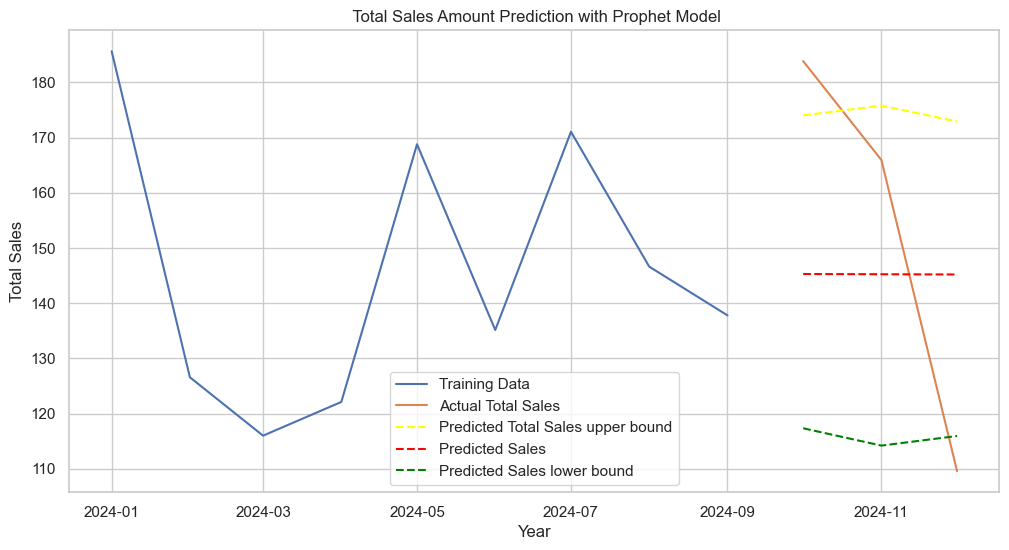

In [94]:
plt.figure(figsize = (12, 6))
plt.plot(train['TOTAL_SALES_VALUE'], label = 'Training Data')
plt.plot(test[['TOTAL_SALES_VALUE']], label = f'Actual Total Sales')
plt.plot(test.index, predictions['yhat_upper'], label = f'Predicted Total Sales upper bound', linestyle ='--', color ='yellow')
plt.plot(test.index, predictions['yhat'], label = f'Predicted Sales', linestyle ='--', color ='red')
plt.plot(test.index, predictions['yhat_lower'], label = f'Predicted Sales lower bound', linestyle ='--', color ='green')
plt.title(' Total Sales Amount Prediction with Prophet Model')
plt.xlabel('Year')
plt.ylabel(f'Total Sales')
plt.legend()
plt.show()

In [95]:
mse = ((predictions['yhat'] - test['TOTAL_SALES_VALUE']) ** 2).mean()
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 1061.7434158892108
Root Mean Squared Error (RMSE): 32.58440448879204


In [96]:
mape = calculate_mape(test['TOTAL_SALES_VALUE'], predictions['yhat_lower'])
print(f'MAPE: {mape:.2f}%')

MAPE: 24.39%


In [97]:
mape = calculate_mape(test['TOTAL_SALES_VALUE'], predictions['yhat'])
print(f'MAPE: {mape:.2f}%')

MAPE: 21.99%


In [98]:
mape = calculate_mape(test['TOTAL_SALES_VALUE'], predictions['yhat_upper'])
print(f'MAPE: {mape:.2f}%')

MAPE: 23.03%


##### Now train with all the 12 months data and predict 3 comming months

In [99]:
prophet_data = monthly_sales_df.reset_index()[["MONTH_YEAR", 'TOTAL_SALES_VALUE']].rename(
    columns={"MONTH_YEAR": "ds", 'TOTAL_SALES_VALUE': "y"}
)
prophet_data

,ds,y
0,2024-01-01,185.626186
1,2024-02-01,126.579702
2,2024-03-01,116.000676
3,2024-04-01,122.110750
4,2024-05-01,168.781502
5,2024-06-01,135.140164
6,2024-07-01,171.042631
7,2024-08-01,146.618918
8,2024-09-01,137.791455
9,2024-10-01,183.840551


In [103]:
# fit the data into a prophet model
# prophet_m.predict(prophet_data)['yhat']

- Making prediction on the 3 new months of 2025 on the dataset using prophet.

In [247]:
# Create a dataframe for the prediction period (Jan to March 2025)
future_dates = pd.date_range(start='2025-01-01', end='2025-03-31', freq='MS')
future_df = pd.DataFrame({'ds': future_dates})
future_df

,ds
0,2025-01-01
1,2025-02-01
2,2025-03-01


In [248]:
# Make predictions
forecast = prophet_m.predict(future_df)

# Display the predicted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2025-01-01,145.150670,116.196032,173.346166
1,2025-02-01,145.106937,115.216542,174.538499
2,2025-03-01,145.067437,114.995680,172.943397


- Sarima model is better for the forecasting here, I think if more data is provided this will give a better prediction, looking forward to it.

### Anomaly Detection:
- Identify any unusual spikes or drops in sales performance (Quantity or Value) and explain possible reasons based on the data.

In [124]:
df_outlier_check = df.copy()
df_outlier_check.columns

Index(['DATE', 'ANONYMIZED_CATEGORY', 'ANONYMIZED_PRODUCT',
       'ANONYMIZED_BUSINESS', 'ANONYMIZED_LOCATION', 'QUANTITY', 'UNIT_PRICE',
       'Month-Year', 'SALES_VALUE', 'TOTAL_SALES_VALUE', 'MONTH_YEAR'],
      dtype='object')

In [127]:
# 1️⃣ **IQR Method for Outlier Detection**
Q1_qty = df_outlier_check['QUANTITY'].quantile(0.25)
Q3_qty = df_outlier_check['QUANTITY'].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty

Q1_val = df_outlier_check['SALES_VALUE'].quantile(0.25)
Q3_val = df_outlier_check['SALES_VALUE'].quantile(0.75)
IQR_val = Q3_val - Q1_val

# Define bounds for anomalies
lower_bound_qty = Q1_qty - 1.5 * IQR_qty
upper_bound_qty = Q3_qty + 1.5 * IQR_qty

lower_bound_val = Q1_val - 1.5 * IQR_val
upper_bound_val = Q3_val + 1.5 * IQR_val

# Mark anomalies
df_outlier_check['IQR_Anomaly_Qty'] = (df_outlier_check['QUANTITY'] < lower_bound_qty) | (df_outlier_check['QUANTITY'] > upper_bound_qty)
df_outlier_check['IQR_Anomaly_Val'] = (df_outlier_check['SALES_VALUE'] < lower_bound_val) | (df_outlier_check['SALES_VALUE'] > upper_bound_val)

In [128]:
df_outlier_check[df_outlier_check['IQR_Anomaly_Qty']]

,DATE,ANONYMIZED_CATEGORY,ANONYMIZED_PRODUCT,ANONYMIZED_BUSINESS,ANONYMIZED_LOCATION,QUANTITY,UNIT_PRICE,Month-Year,SALES_VALUE,TOTAL_SALES_VALUE,MONTH_YEAR,IQR_Anomaly_Qty,IQR_Anomaly_Val
0,2024-01-01 05:54:00,Category-75,Product-086d,Business-83dd,Location-66f4,10,2185.0,2024-01,21850.0,21850.0,2024-01,True,True
11,2024-01-01 13:24:00,Category-100,Product-b9c9,Business-75fe,Location-f21b,5,2160.0,2024-01,10800.0,10800.0,2024-01,True,False
15,2024-01-01 13:30:00,Category-75,Product-086d,Business-6a90,Location-b125,10,2185.0,2024-01,21850.0,21850.0,2024-01,True,True
16,2024-01-01 13:40:00,Category-75,Product-6aa1,Business-b22c,Location-f7fa,10,2199.0,2024-01,21990.0,21990.0,2024-01,True,True
17,2024-01-01 13:40:00,Category-100,Product-b9c9,Business-b22c,Location-f7fa,30,2160.0,2024-01,64800.0,64800.0,2024-01,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329841,2024-12-31 18:01:00,Category-99,Product-4646,Business-64de,Location-3fc0,5,640.0,2024-12,3200.0,3200.0,2024-12,True,False
329844,2024-12-31 18:01:00,Category-120,Product-0451,Business-64de,Location-3fc0,5,1740.0,2024-12,8700.0,8700.0,2024-12,True,False
329846,2024-12-31 18:02:00,Category-85,Product-0c64,Business-fef1,Location-3e32,4,1260.0,2024-12,5040.0,5040.0,2024-12,True,False
329869,2024-12-31 18:19:00,Category-108,Product-ee77,Business-7a03,Location-3fc0,20,140.0,2024-12,2800.0,2800.0,2024-12,True,False


In [129]:
df_outlier_check[df_outlier_check['IQR_Anomaly_Val']]

,DATE,ANONYMIZED_CATEGORY,ANONYMIZED_PRODUCT,ANONYMIZED_BUSINESS,ANONYMIZED_LOCATION,QUANTITY,UNIT_PRICE,Month-Year,SALES_VALUE,TOTAL_SALES_VALUE,MONTH_YEAR,IQR_Anomaly_Qty,IQR_Anomaly_Val
0,2024-01-01 05:54:00,Category-75,Product-086d,Business-83dd,Location-66f4,10,2185.0,2024-01,21850.0,21850.0,2024-01,True,True
15,2024-01-01 13:30:00,Category-75,Product-086d,Business-6a90,Location-b125,10,2185.0,2024-01,21850.0,21850.0,2024-01,True,True
16,2024-01-01 13:40:00,Category-75,Product-6aa1,Business-b22c,Location-f7fa,10,2199.0,2024-01,21990.0,21990.0,2024-01,True,True
17,2024-01-01 13:40:00,Category-100,Product-b9c9,Business-b22c,Location-f7fa,30,2160.0,2024-01,64800.0,64800.0,2024-01,True,True
22,2024-01-01 14:28:00,Category-75,Product-2175,Business-926b,Location-d32a,3,4365.0,2024-01,13095.0,13095.0,2024-01,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329747,2024-12-31 17:29:00,Category-120,Product-4156,Business-5f36,Location-c2f2,15,1900.0,2024-12,28500.0,28500.0,2024-12,True,True
329783,2024-12-31 17:46:00,Category-119,Product-66e0,Business-7a03,Location-3fc0,10,1650.0,2024-12,16500.0,16500.0,2024-12,True,True
329818,2024-12-31 17:54:00,Category-119,Product-5ec7,Business-a8d5,Location-3e32,10,1700.0,2024-12,17000.0,17000.0,2024-12,True,True
329838,2024-12-31 18:01:00,Category-121,Product-afb7,Business-64de,Location-3fc0,10,1415.0,2024-12,14150.0,14150.0,2024-12,True,True


* Z-Score Method for Outlier Detection**

In [131]:

df_outlier_check['Z_Score_Qty'] = zscore(df_outlier_check['QUANTITY'])
df_outlier_check['Z_Score_Val'] = zscore(df_outlier_check['SALES_VALUE'])

# Define threshold for anomalies
threshold = 2.5
df_outlier_check['Z_Anomaly_Qty'] = (np.abs(df_outlier_check['Z_Score_Qty']) > threshold)
df_outlier_check['Z_Anomaly_Val'] = (np.abs(df_outlier_check['Z_Score_Val']) > threshold)

In [133]:
df_outlier_check[df_outlier_check['Z_Anomaly_Qty']]

,DATE,ANONYMIZED_CATEGORY,ANONYMIZED_PRODUCT,ANONYMIZED_BUSINESS,ANONYMIZED_LOCATION,QUANTITY,UNIT_PRICE,Month-Year,SALES_VALUE,TOTAL_SALES_VALUE,MONTH_YEAR,IQR_Anomaly_Qty,IQR_Anomaly_Val,Z_Score_Qty,Z_Score_Val,Z_Anomaly_Qty,Z_Anomaly_Val
17,2024-01-01 13:40:00,Category-100,Product-b9c9,Business-b22c,Location-f7fa,30,2160.0,2024-01,64800.0,64800.0,2024-01,True,True,7.346049,5.431029,True,True
51,2024-01-01 15:30:00,Category-120,Product-29ee,Business-1e3e,Location-03fc,100,2120.0,2024-01,212000.0,212000.0,2024-01,True,True,25.924505,18.881285,True,True
54,2024-01-01 15:30:00,Category-100,Product-392e,Business-1e3e,Location-03fc,50,1696.0,2024-01,84800.0,84800.0,2024-01,True,True,12.654180,7.258509,True,True
141,2024-01-01 16:02:00,Category-75,Product-086d,Business-80b3,Location-f37d,15,2185.0,2024-01,32775.0,32775.0,2024-01,True,True,3.364952,2.504776,True,True
457,2024-01-01 17:47:00,Category-75,Product-2175,Business-fe7d,Location-689f,20,4365.0,2024-01,87300.0,87300.0,2024-01,True,True,4.691984,7.486944,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329718,2024-12-31 17:19:00,Category-100,Product-94a8,Business-978e,Location-1c33,20,1920.0,2024-12,38400.0,38400.0,2024-12,True,True,4.691984,3.018755,True,True
329727,2024-12-31 17:19:00,Category-94,Product-f5d3,Business-978e,Location-1c33,39,575.0,2024-12,22425.0,22425.0,2024-12,True,True,9.734708,1.559055,True,False
329730,2024-12-31 17:19:00,Category-100,Product-f3ee,Business-978e,Location-1c33,15,1890.0,2024-12,28350.0,28350.0,2024-12,True,True,3.364952,2.100446,True,False
329747,2024-12-31 17:29:00,Category-120,Product-4156,Business-5f36,Location-c2f2,15,1900.0,2024-12,28500.0,28500.0,2024-12,True,True,3.364952,2.114152,True,False


In [132]:
df_outlier_check[df_outlier_check['Z_Anomaly_Val']]

,DATE,ANONYMIZED_CATEGORY,ANONYMIZED_PRODUCT,ANONYMIZED_BUSINESS,ANONYMIZED_LOCATION,QUANTITY,UNIT_PRICE,Month-Year,SALES_VALUE,TOTAL_SALES_VALUE,MONTH_YEAR,IQR_Anomaly_Qty,IQR_Anomaly_Val,Z_Score_Qty,Z_Score_Val,Z_Anomaly_Qty,Z_Anomaly_Val
17,2024-01-01 13:40:00,Category-100,Product-b9c9,Business-b22c,Location-f7fa,30,2160.0,2024-01,64800.0,64800.0,2024-01,True,True,7.346049,5.431029,True,True
51,2024-01-01 15:30:00,Category-120,Product-29ee,Business-1e3e,Location-03fc,100,2120.0,2024-01,212000.0,212000.0,2024-01,True,True,25.924505,18.881285,True,True
54,2024-01-01 15:30:00,Category-100,Product-392e,Business-1e3e,Location-03fc,50,1696.0,2024-01,84800.0,84800.0,2024-01,True,True,12.654180,7.258509,True,True
141,2024-01-01 16:02:00,Category-75,Product-086d,Business-80b3,Location-f37d,15,2185.0,2024-01,32775.0,32775.0,2024-01,True,True,3.364952,2.504776,True,True
196,2024-01-01 16:19:00,Category-76,Product-e805,Business-6b30,Location-689f,5,7580.0,2024-01,37900.0,37900.0,2024-01,True,True,0.710886,2.973068,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329281,2024-12-31 08:49:00,Category-100,Product-68e7,Business-6836,Location-3945,20,1710.0,2024-12,34200.0,34200.0,2024-12,True,True,4.691984,2.634984,True,True
329282,2024-12-31 08:50:00,Category-75,Product-1196,Business-4a1c,Location-3945,10,4850.0,2024-12,48500.0,48500.0,2024-12,True,True,2.037919,3.941632,False,True
329316,2024-12-31 09:19:00,Category-75,Product-1196,Business-4490,Location-21c7,9,4850.0,2024-12,43650.0,43650.0,2024-12,True,True,1.772512,3.498468,False,True
329435,2024-12-31 12:52:00,Category-91,Product-3f76,Business-d7ac,Location-7f37,69,2500.0,2024-12,172500.0,172500.0,2024-12,True,True,17.696903,15.272011,True,True


**Isolation Forest (Machine Learning-Based Anomaly Detection)**

In [135]:

model = IsolationForest(contamination=0.02, random_state=42)
df_outlier_check['Iso_Anomaly'] = model.fit_predict(df_outlier_check[['QUANTITY', 'SALES_VALUE']])
df_outlier_check['Iso_Anomaly'] = df_outlier_check['Iso_Anomaly'] == -1  # Convert -1 (anomaly) to True

In [137]:
df_outlier_check[df_outlier_check['Iso_Anomaly']]

,DATE,ANONYMIZED_CATEGORY,ANONYMIZED_PRODUCT,ANONYMIZED_BUSINESS,ANONYMIZED_LOCATION,QUANTITY,UNIT_PRICE,Month-Year,SALES_VALUE,TOTAL_SALES_VALUE,MONTH_YEAR,IQR_Anomaly_Qty,IQR_Anomaly_Val,Z_Score_Qty,Z_Score_Val,Z_Anomaly_Qty,Z_Anomaly_Val,Iso_Anomaly
17,2024-01-01 13:40:00,Category-100,Product-b9c9,Business-b22c,Location-f7fa,30,2160.0,2024-01,64800.0,64800.0,2024-01,True,True,7.346049,5.431029,True,True,True
51,2024-01-01 15:30:00,Category-120,Product-29ee,Business-1e3e,Location-03fc,100,2120.0,2024-01,212000.0,212000.0,2024-01,True,True,25.924505,18.881285,True,True,True
54,2024-01-01 15:30:00,Category-100,Product-392e,Business-1e3e,Location-03fc,50,1696.0,2024-01,84800.0,84800.0,2024-01,True,True,12.654180,7.258509,True,True,True
141,2024-01-01 16:02:00,Category-75,Product-086d,Business-80b3,Location-f37d,15,2185.0,2024-01,32775.0,32775.0,2024-01,True,True,3.364952,2.504776,True,True,True
196,2024-01-01 16:19:00,Category-76,Product-e805,Business-6b30,Location-689f,5,7580.0,2024-01,37900.0,37900.0,2024-01,True,True,0.710886,2.973068,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329718,2024-12-31 17:19:00,Category-100,Product-94a8,Business-978e,Location-1c33,20,1920.0,2024-12,38400.0,38400.0,2024-12,True,True,4.691984,3.018755,True,True,True
329727,2024-12-31 17:19:00,Category-94,Product-f5d3,Business-978e,Location-1c33,39,575.0,2024-12,22425.0,22425.0,2024-12,True,True,9.734708,1.559055,True,False,True
329730,2024-12-31 17:19:00,Category-100,Product-f3ee,Business-978e,Location-1c33,15,1890.0,2024-12,28350.0,28350.0,2024-12,True,True,3.364952,2.100446,True,False,True
329747,2024-12-31 17:29:00,Category-120,Product-4156,Business-5f36,Location-c2f2,15,1900.0,2024-12,28500.0,28500.0,2024-12,True,True,3.364952,2.114152,True,False,True


**Filter Only Anomalous Sales**

In [144]:
anomalies = df_outlier_check[df_outlier_check[['IQR_Anomaly_Qty', 'IQR_Anomaly_Val', 'Z_Anomaly_Qty', 'Z_Anomaly_Val', 'Iso_Anomaly']].any(axis=1)]

# Display anomalies
anomalies[['DATE', 'ANONYMIZED_PRODUCT', 'QUANTITY', 'SALES_VALUE', 
                 'IQR_Anomaly_Qty', 'IQR_Anomaly_Val', 
                 'Z_Anomaly_Qty', 'Z_Anomaly_Val', 'Iso_Anomaly']].head()

,DATE,ANONYMIZED_PRODUCT,QUANTITY,SALES_VALUE,IQR_Anomaly_Qty,IQR_Anomaly_Val,Z_Anomaly_Qty,Z_Anomaly_Val,Iso_Anomaly
0,2024-01-01 05:54:00,Product-086d,10,21850.0,True,True,False,False,False
11,2024-01-01 13:24:00,Product-b9c9,5,10800.0,True,False,False,False,False
15,2024-01-01 13:30:00,Product-086d,10,21850.0,True,True,False,False,False
16,2024-01-01 13:40:00,Product-6aa1,10,21990.0,True,True,False,False,False
17,2024-01-01 13:40:00,Product-b9c9,30,64800.0,True,True,True,True,True


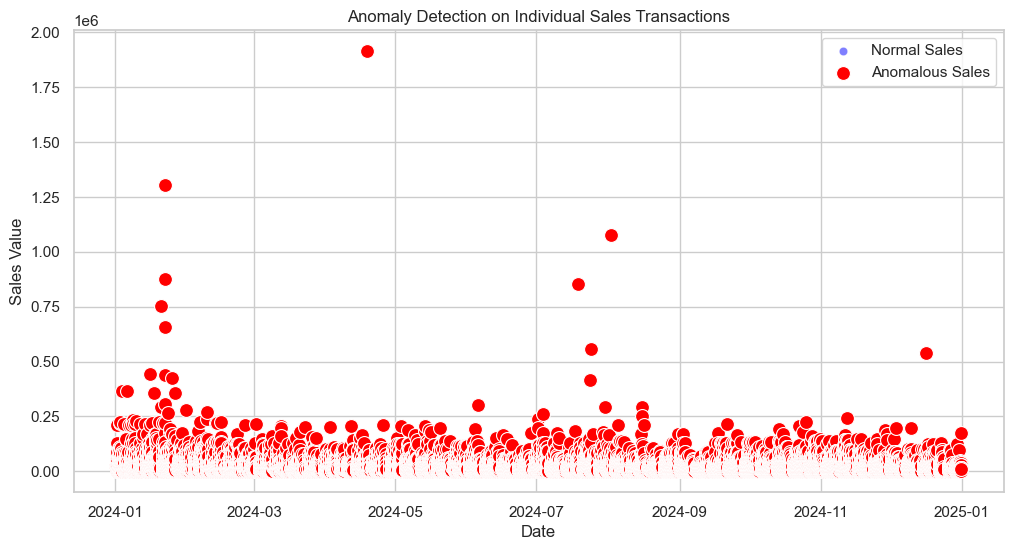

In [142]:
# Visualization - Anomalies in Sales
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_outlier_check, x='DATE', y='SALES_VALUE', label='Normal Sales', color='blue', alpha=0.5)
sns.scatterplot(data=anomalies, x='DATE', y='SALES_VALUE', color='red', label='Anomalous Sales', s=100)
plt.title('Anomaly Detection on Individual Sales Transactions')
plt.xlabel('Date')
plt.ylabel('Sales Value')
plt.legend()
plt.show()

* Correlation Analysis:Examine relationships between Quantity and Value. Provide insights into which factors drive sales performance.

In [104]:
monthly_sales.head()

,MONTH_YEAR,TOTAL_SALES_VALUE,QUANTITY
0,2024-01-01,185.626186,67.526
1,2024-02-01,126.579702,44.063
2,2024-03-01,116.000676,45.381
3,2024-04-01,122.110750,50.554
4,2024-05-01,168.781502,69.551


In [106]:
monthly_sales[['TOTAL_SALES_VALUE', 'QUANTITY']].corr()

,TOTAL_SALES_VALUE,QUANTITY
TOTAL_SALES_VALUE,1.000000,0.831049
QUANTITY,0.831049,1.000000


> Correlation between Quantity and Sales show a Strong Positive corellation of 0.83 .This show that the more quantity more value is derived. (the more the qauntiy the more the sales value.)

* Section 4: Strategic Insights and Recommendations (20 points)

* Product Strategy: Based on your analysis, recommend one product category to prioritize for marketing campaigns. Justify your choice using the data

In [119]:
# Identify top 5 most valuable products(sales value)
top_10_valuable_products = product_summary.nlargest(20, 'Total_Sales_Value').reset_index(drop=True)
top_10_valuable_products

,ANONYMIZED_PRODUCT,Total_Quantity,Total_Sales_Value,Sales_Contribution,Quantity_Contribution,ASP
0,Product-e805,42602,262787281.0,14.854940,5.562941,6168.425919
1,Product-8f75,37566,158797460.0,8.976564,4.905343,4227.159133
2,Product-66e0,46957,70704225.0,3.996795,6.131614,1505.722789
3,Product-29ee,35940,68248274.0,3.857965,4.693021,1898.950306
4,Product-4156,28487,56956007.0,3.219631,3.719813,1999.368379
5,Product-faa5,12764,55751850.0,3.151562,1.666715,4367.897994
6,Product-2175,11985,52581105.0,2.972325,1.564993,4387.242804
7,Product-d09c,18081,50089697.0,2.831490,2.361005,2770.294619
8,Product-3050,23751,44690235.0,2.526267,3.101390,1881.614879
9,Product-b31e,8902,39149239.0,2.213043,1.162417,4397.802629


In [116]:
# Calculate total sales value and total quantity
total_sales_value = product_summary['Total_Sales_Value'].sum()
total_quantity = product_summary['Total_Quantity'].sum()

# Calculate Sales Contribution (% of total sales)
product_summary['Sales_Contribution'] = (product_summary['Total_Sales_Value'] / total_sales_value) * 100

# Calculate Quantity Contribution (% of total quantity)
product_summary['Quantity_Contribution'] = (product_summary['Total_Quantity'] / total_quantity) * 100

# Calculate Average Selling Price (ASP)
product_summary['ASP'] = product_summary['Total_Sales_Value'] / product_summary['Total_Quantity']
product_summary.head()

,ANONYMIZED_PRODUCT,Total_Quantity,Total_Sales_Value,Sales_Contribution,Quantity_Contribution,ASP
0,Product-0001,286,730730.0,0.041307,0.037346,2555.000000
1,Product-0031,49,85554.0,0.004836,0.006398,1746.000000
2,Product-004f,8,39040.0,0.002207,0.001045,4880.000000
3,Product-02e4,225,58620.0,0.003314,0.029380,260.533333
4,Product-031c,1237,2404010.0,0.135895,0.161527,1943.419563


In [118]:
product_summary.sort_values(by='Sales_Contribution', ascending=False).head()

,ANONYMIZED_PRODUCT,Total_Quantity,Total_Sales_Value,Sales_Contribution,Quantity_Contribution,ASP
750,Product-e805,42602,262787281.0,14.854940,5.562941,6168.425919
476,Product-8f75,37566,158797460.0,8.976564,4.905343,4227.159133
338,Product-66e0,46957,70704225.0,3.996795,6.131614,1505.722789
127,Product-29ee,35940,68248274.0,3.857965,4.693021,1898.950306
213,Product-4156,28487,56956007.0,3.219631,3.719813,1999.368379


- For a product to prioritise, I choose **PProduct-e805**
- **Why** This product to me seems a potential product to generate more Sales.
    - Currently the product contributes 14% of total sales, making it the most significant revenue Driver.
    - It demand also is high making a contribution of 5.56% so this product seem to prioritised by customers or it sove a particular available niche in the market currently.

- *NOTE*: There also other products that seems to generate great sale thou less sold currently myabe a look into the product also needs to highlight like for product **Product-b31e**

#### Customer Retention: Identify businesses that have reduced their purchase frequency over time. Suggest strategies to re-engage these customers.

In [127]:
df.columns

Index(['DATE', 'ANONYMIZED_CATEGORY', 'ANONYMIZED_PRODUCT',
       'ANONYMIZED_BUSINESS', 'ANONYMIZED_LOCATION', 'QUANTITY', 'UNIT_PRICE',
       'Month-Year', 'SALES_VALUE', 'TOTAL_SALES_VALUE', 'MONTH_YEAR'],
      dtype='object')

In [129]:
# group product, thn to get total sales value and quantity of each product
product_summary = df.groupby(['ANONYMIZED_BUSINESS', 'MONTH_YEAR']).agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Sales_Value=('TOTAL_SALES_VALUE', 'sum')
).reset_index()

product_summary.sort_values(by=['ANONYMIZED_BUSINESS', 'MONTH_YEAR']).head()

,ANONYMIZED_BUSINESS,MONTH_YEAR,Total_Quantity,Total_Sales_Value
0,Business-0000,2024-06,2,3140.0
1,Business-0000,2024-08,1,185.0
2,Business-0000,2024-10,3,4240.0
3,Business-0000,2024-11,1,2700.0
4,Business-0000,2024-12,1,180.0


In [130]:
product_summary.sort_values(by=['ANONYMIZED_BUSINESS', 'MONTH_YEAR'])

,ANONYMIZED_BUSINESS,MONTH_YEAR,Total_Quantity,Total_Sales_Value
0,Business-0000,2024-06,2,3140.0
1,Business-0000,2024-08,1,185.0
2,Business-0000,2024-10,3,4240.0
3,Business-0000,2024-11,1,2700.0
4,Business-0000,2024-12,1,180.0
...,...,...,...,...
20678,Business-ffd2,2024-09,8,12448.0
20679,Business-ffff,2024-09,18,18310.0
20680,Business-ffff,2024-10,25,25275.0
20681,Business-ffff,2024-11,50,55645.0


In [134]:
# Sort data by business and time
product_summary = product_summary.sort_values(by=['ANONYMIZED_BUSINESS', 'MONTH_YEAR'])

# Calculate month-over-month percentage change
product_summary['Quantity_Change'] = product_summary.groupby('ANONYMIZED_BUSINESS')['Total_Quantity'].pct_change()
product_summary['Sales_Value_Change'] = product_summary.groupby('ANONYMIZED_BUSINESS')['Total_Sales_Value'].pct_change()

# Identify businesses with consistent decline over multiple months
declining_businesses = product_summary.groupby('ANONYMIZED_BUSINESS').filter(
    lambda x: (x['Quantity_Change'] < 0).sum() >= 3  
)

# Businesses with declining sales
list(declining_businesses['ANONYMIZED_BUSINESS'].unique())

['Business-0072',
 'Business-0078',
 'Business-016c',
 'Business-0204',
 'Business-0287',
 'Business-0354',
 'Business-0357',
 'Business-0384',
 'Business-03a3',
 'Business-03ac',
 'Business-03e1',
 'Business-040a',
 'Business-044c',
 'Business-045b',
 'Business-046d',
 'Business-04b6',
 'Business-0523',
 'Business-053b',
 'Business-05d3',
 'Business-0610',
 'Business-069f',
 'Business-06ba',
 'Business-06ed',
 'Business-076a',
 'Business-07de',
 'Business-07ef',
 'Business-0825',
 'Business-0855',
 'Business-0872',
 'Business-089e',
 'Business-08e8',
 'Business-09a0',
 'Business-09ae',
 'Business-09c8',
 'Business-0a38',
 'Business-0ad5',
 'Business-0ad6',
 'Business-0af3',
 'Business-0b68',
 'Business-0b84',
 'Business-0c75',
 'Business-0c77',
 'Business-0c88',
 'Business-0c98',
 'Business-0ca8',
 'Business-0cbc',
 'Business-0cd5',
 'Business-0d26',
 'Business-0d27',
 'Business-0d61',
 'Business-0d9c',
 'Business-0daa',
 'Business-0dbe',
 'Business-0e22',
 'Business-0e56',
 'Business

- Strategies to re-engage this Customers:
    - Making Sure this bussines stock the most favaourite Products by customers.
    - Run A/B Testing to try engage on there preferences
    - Maybe Introduction of discount traffis on these business.
    - Looking into competitors around to maybe thet have drive our customers
    - Doing Campaign awareness on things being introduced in these busines around there vicinities.

#### Operational Efficiency: Suggest improvements to inventory management or supply chain processes based on trends in product performance and seasonal demand.

- using The forecasting Output(sarima model seemed to capture the seasonality) we can now how to restocked, more data thou is need to reaaly capture the seasonalty issue here.
- Maybe imporving Invertory management by classifying products based on demand, so we can make sure high-demand rpoducts always need to available.

#### Bonus Section: Open-Ended Problem (Optional, 10 points)

- Predictive Analysis: Identify external factors that could influence sales (e.g., economic conditions, competitor actions). Propose a methodology to incorporate such factors into future analyses.  

    - I have worked previous on predictive model @ KRa to predict revenue collection, And I want to identity such factors, mostly is trial and error on all the features we think might be affecting the sales. For example we might need to look into the country's GDP, Politics effects, 
    look into competitors effect on the market also, maybe have a marco and micro features listed and maybe we track them so we utilized them or model training.

- Scalability: If the dataset were 10 times larger, what optimizations would you implement for data storage, processing, and analysis?
    - This is where Data Modelling and Warehousing skill come in. Modelling has several Design from common One **star**, **snowflake** schemas, Data vault. Since our data is currently sales record, I think developing a warehouse using star schema approach for a start will be great, maybe with time where need come in or more dimension or slicing Anaysis Needs arise we might consider a Snoflake approach.

#### 